In [1]:
"""Predict poses for given images."""

import argparse
import glob
import json
import os
import torchvision
import numpy as np
import torch

from openpsf.decoder.processor2 import Processor
from openpsf.decoder.pifpafpsf import PifPaf
from openpsf.visualize.img_plot import image_plot
from openpsf import datasets, decoder


    # load model
pretrained = torch.load('resnet152block5-pif-paf-psf-edge401-190524-164346.pkl.epoch007')['model']
model = pretrained
pifpaf = PifPaf(8, 0.3, force_complete=True)
processor = Processor(model, pifpaf,
                      instance_threshold=0,
                      keypoint_threshold=0.05)

normalize = torchvision.transforms.Normalize(  # pylint: disable=invalid-name
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

transformer = torchvision.transforms.Compose([  # pylint: disable=invalid-name
    torchvision.transforms.ToTensor(),
    normalize,
])
transformer1 = torchvision.transforms.Compose([  # pylint: disable=invalid-name
])
# data

data = datasets.ImageList(['007109_l.png','007109_r.png'],image_transform= transformer,orimage_transform= transformer1)
data_loader = torch.utils.data.DataLoader(
    data, batch_size=2, shuffle=False)




/Users/dengwenlong/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'openpsf.network.nets.Shell_psf' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/dengwenlong/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/dengwenlong/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the origina

nn processing time 44.24552917480469
total processing time 46.80426335334778


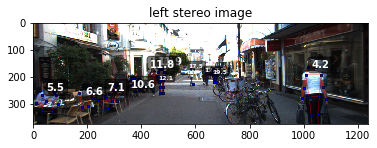

In [15]:

for image_i, (image_paths, image_tensors, processed_images_cpu) in enumerate(data_loader):

    processed_images = processed_images_cpu
    # unbatch
    image_path = image_paths[0]
    ## save the keypoint pairs
    pairs = processor.keypoint_sets(processed_images)
    image_plot(pairs[0],image_tensors[1].permute(1,2,0).detach().numpy(),True)


In [16]:
processed_images_cpu.shape

torch.Size([2, 3, 374, 1238])

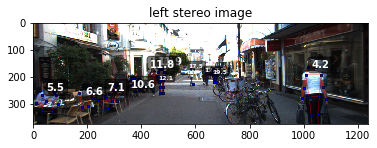